# Préparation du fond de carte

In [59]:
Antenne_Info=pd.read_csv('AntennaInfo_MNO_MNO1.csv') # Open csv
Antenne_Info.columns=['t','Antenna_Id','Event_code','Device_ID','x','y','Tile_ID'] #Set column names
Antenne_Info=Antenne_Info[['Antenna_Id','x','y']] # Keep interesting stuff
Antenne_Info=Antenne_Info.drop_duplicates(ignore_index=True) # drop duplicates

In [71]:
# Transform x,y position into shapely like POINTS
geometry = pd.DataFrame([Point(xy) for xy in zip(Antenne_Info.x, Antenne_Info.y)],columns=['geometry'])

In [53]:
# Merge back with the data 
Antenne_Info=pd.concat([Antenne_Info,geometry],axis=1)

In [54]:
# Transform panda into geopanda using the geometry defined
gdf = geopandas.GeoDataFrame(Antenne_Info, geometry='geometry')

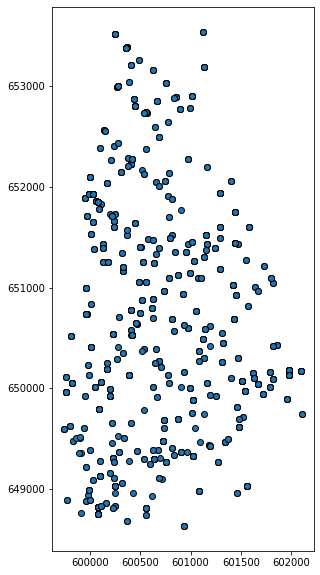

In [82]:
# plot 

gdf.plot(edgecolor='black',figsize=(20, 10))

In [1]:
import pandas as pd

In [2]:
Antenne_Cells=pd.read_csv('AntennaCells_MNO1.csv',sep=';')

In [3]:
Antenne_Cells

,AntennaId,Cell Coordinates
0,228,"POLYGON ((605746.0 652326.0, 605737.0 652605.0..."
1,227,"POLYGON ((605586.5 652789.5, 605578.0 653068.5..."
2,226,"POLYGON ((604621.5 650183.5, 604612.5 650462.5..."
3,225,"POLYGON ((604471.5 650255.0, 604463.0 650534.0..."
4,224,"POLYGON ((604524.0 650344.0, 604515.0 650623.0..."
...,...,...
223,5,"POLYGON ((604198.0 649007.5, 604189.5 649286.5..."
224,4,"POLYGON ((604421.0 650092.5, 604412.0 650371.5..."
225,3,"POLYGON ((605418.0 648571.0, 605409.5 648850.0..."
226,2,"POLYGON ((606277.5 650072.0, 606268.5 650351.0..."


In [4]:
from shapely.geometry import Point, Polygon

In [5]:
import geopandas as gpd

In [6]:
from shapely import wkt
Antenne_Cells['Cell Coordinates']=Antenne_Cells['Cell Coordinates'].apply(wkt.loads)

In [7]:
Antenne_Cells_min

NameError: name 'Antenne_Cells_min' is not defined

In [8]:
Antenne_Cells_min=Antenne_Cells[0:10]

In [9]:
Antenne_Cells_min

,AntennaId,Cell Coordinates
0,228,"POLYGON ((605746 652326, 605737 652605, 605711..."
1,227,"POLYGON ((605586.5 652789.5, 605578 653068.5, ..."
2,226,"POLYGON ((604621.5 650183.5, 604612.5 650462.5..."
3,225,"POLYGON ((604471.5 650255, 604463 650534, 6044..."
4,224,"POLYGON ((604524 650344, 604515 650623, 604489..."
5,223,"POLYGON ((604519 650334.5, 604510 650613.5, 60..."
6,222,"POLYGON ((604571 650127, 604562 650406, 604536..."
7,221,"POLYGON ((604599 650119, 604590 650398, 604564..."
8,220,"POLYGON ((605319 648545, 605310.5 648824, 6052..."
9,219,"POLYGON ((604857 648563.5, 604848 648842.5, 60..."


In [17]:
import geopandas
import matplotlib as plt
import descartes
import geoplot

gdf = geopandas.GeoDataFrame(Antenne_Cells, geometry='Cell Coordinates')

In [ ]:
gdf['centroid'] = gdf.geometry.centroid

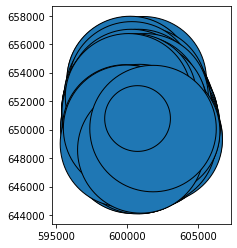

In [18]:
gdf.plot(edgecolor='black')

In [19]:
Antenne_Info=pd.read_csv('AntennaInfo_MNO_MNO1.csv')

In [20]:
Antenne_Info.columns=['t','Antenna_Id','Event_code','Device_ID','x','y','Tile_ID']

In [21]:
Antenne_Info

,t,Antenna_Id,Event_code,Device_ID,x,y,Tile_ID
0,0,10,0,253,600714.924071,649097.225440,145
1,0,23,0,245,600110.959703,651829.085065,895
2,0,5,0,280,599917.314726,648764.937245,56
3,0,23,0,246,600110.959703,651829.085065,895
4,0,39,0,276,601136.553094,649742.965420,338
...,...,...,...,...,...,...,...
1429,49,115,1,284,600463.509336,650650.394670,574
1430,49,136,2,280,601194.298581,649422.484527,258
1431,49,115,1,283,600463.509336,650650.394670,574
1432,49,201,0,283,600463.509336,650650.394670,574


In [27]:
geometry = pd.DataFrame([Point(xy) for xy in zip(Antenne_Info.x, Antenne_Info.y)],columns=['geometry'])

In [31]:
Antenne_Info=pd.concat([Antenne_Info,geometry],axis=1)

In [33]:
gdf = geopandas.GeoDataFrame(Antenne_Info, geometry='geometry')

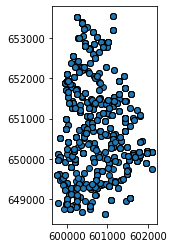

In [34]:
gdf.plot(edgecolor='black')

In [39]:
antennas.sort_values('Tile ID')

,t,Antenna ID,x,y,MNO ID,Tile ID
9,0,219,600414.591803,648563.328886,0,7
187,0,41,600387.556938,648550.461488,0,7
112,0,116,600637.992342,648595.731186,0,9
199,0,29,600765.973422,648518.547301,0,10
8,0,220,600876.994620,648545.178606,0,11
...,...,...,...,...,...,...
193,0,35,600346.072750,653141.530549,0,1248
69,0,159,600995.886733,653146.024897,0,1255
91,0,137,600229.854735,653479.816784,0,1328
87,0,141,601142.871113,653501.860968,0,1337


In [42]:
geometry = pd.DataFrame([Point(xy) for xy in zip(antennas.x, antennas.y)],columns=['geometry'])

In [44]:
antennas=pd.concat([antennas,geometry],axis=1)

In [45]:
gdf = geopandas.GeoDataFrame(antennas, geometry='geometry')

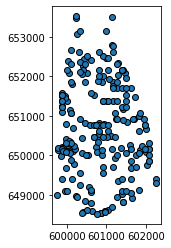

In [48]:
gdf.plot(edgecolor='black')

In [47]:
antennas

,t,Antenna ID,x,y,MNO ID,Tile ID,geometry
0,0,228,601303.741421,652326.078740,0,1042,POINT (601303.741 652326.079)
1,0,227,601144.334233,652789.343736,0,1148,POINT (601144.334 652789.344)
2,0,226,600179.115488,650183.325527,0,437,POINT (600179.115 650183.326)
3,0,225,600029.392548,650255.195726,0,462,POINT (600029.393 650255.196)
4,0,224,600081.671158,650344.149151,0,490,POINT (600081.671 650344.149)
...,...,...,...,...,...,...,...
223,0,5,599755.922448,649007.419283,0,135,POINT (599755.922 649007.419)
224,0,4,599978.637691,650092.373982,0,408,POINT (599978.638 650092.374)
225,0,3,600975.980512,648571.144499,0,12,POINT (600975.981 648571.144)
226,0,2,601835.158213,650072.077820,0,426,POINT (601835.158 650072.078)


In [36]:
antennas=pd.read_csv('antennas.csv')

In [37]:
antennas

,t,Antenna ID,x,y,MNO ID,Tile ID
0,0,228,601303.741421,652326.078740,0,1042
1,0,227,601144.334233,652789.343736,0,1148
2,0,226,600179.115488,650183.325527,0,437
3,0,225,600029.392548,650255.195726,0,462
4,0,224,600081.671158,650344.149151,0,490
...,...,...,...,...,...,...
223,0,5,599755.922448,649007.419283,0,135
224,0,4,599978.637691,650092.373982,0,408
225,0,3,600975.980512,648571.144499,0,12
226,0,2,601835.158213,650072.077820,0,426


In [9]:
from shapely.geometry import Point, Polygon

In [37]:
import geopandas as gpd

In [54]:
gpd.read_file('AntennaCells_MNO1.csv')

IndexError: too many indices for array

IndexError: too many indices for array

In [39]:
data

IndexError: too many indices for array

IndexError: too many indices for array

In [32]:
Antenne_Cells['Cell_coordinates'][1]

POLYGON ((603057.0 650776.0   603052.5 650921.0   603038.5 651065.5   603016.0 651209.0   602984.5 651350.5   602944.0 651489.5   602895.0 651626.0   602837.0 651759.0   602771.5 651888.5   602697.5 652013.5   602616.0 652133.0   602527.0 652248.0   602431.0 652356.5   602328.5 652459.0   602220.0 652555.0   602105.0 652644.0   601985.5 652725.5   601860.5 652799.5   601731.0 652865.0   601598.0 652923.0   601461.5 652972.0   601322.5 653012.5   601181.0 653044.0   601037.5 653066.5   600893.0 653080.5   600748.0 653085.0   600603.0 653080.5   600459.0 653066.5   600315.5 653044.0   600174.0 653012.5   600035.0 652972.0   599898.5 652923.0   599765.0 652865.0   599636.0 652799.5   599511.0 652725.5   599391.0 652644.0   599276.5 652555.0   599168.0 652459.0   599065.0 652356.5   598969.5 652248.0   598880.5 652133.0   598799.0 652013.5   598725.0 651888.5   598659.0 651759.0   598601.5 651626.0   598552.5 651489.5   598512.0 651350.5   598480.5 651209.0   598457.5 651065.5   598444.0 6

In [34]:
from shapely import wkt
Antenne_Cells['Cell_coordinates'].apply(wkt.loads)

ParseException: Expected word but encountered number: '605746'


WKTReadingError: Could not create geometry because of errors while reading input.

In [29]:
my_geo_df = geopandas.GeoDataFrame(Antenne_Cells, geometry='Cell_coordinates')

TypeError: Input must be valid geometry objects:  605746.0 652326.0))

In [ ]:
df.columns
Index([u'ID', u'X', u'Y'], dtype='object')